# Fashion-mnist Training Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [3]:
# training accuracies

baseline = pd.read_csv('fashion-mnist/training-data/baseline/baseline-simple.csv')
branch = pd.read_csv('fashion-mnist/training-data/branch-net/branch-net-simple.csv')
split = pd.read_csv('fashion-mnist/training-data/split-baseline-net/split-baseline-net-simple.csv')
concat = pd.read_csv('fashion-mnist/training-data/concat-net/concat-net-simple.csv')
guide = pd.read_csv('fashion-mnist/training-data/guide-net/guide-net-simple.csv')

adap_branch = pd.read_csv('fashion-mnist/training-data/branch-net/adaptative-branch-net-simple.csv')
adap_split = pd.read_csv('fashion-mnist/training-data/split-baseline-net/adaptative-split-baseline-net-simple.csv')
adap_concat = pd.read_csv('fashion-mnist/training-data/concat-net/adaptative-concat-net-simple.csv')
adap_guide = pd.read_csv('fashion-mnist/training-data/guide-net/adaptative-guide-net-simple.csv')

In [4]:
df_loss = pd.DataFrame(data = {'baseline': baseline['loss'],
                              'branch-net': branch['loss'],
                              'split-net': split['loss'],
                              'concat-net': concat['loss'],
                              'guide-net': guide['loss']})

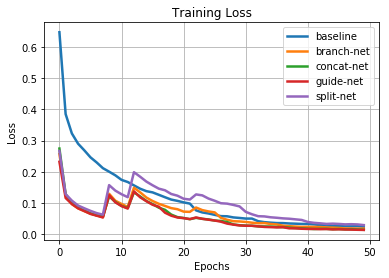

In [5]:
plt.plot(df_loss, linewidth=2.5)
plt.grid()
plt.legend(df_loss.columns)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('_analysis-files/fashion-mnist/training-loss.pdf')
plt.show()

In [83]:
df_adap_loss = pd.DataFrame(data = {'baseline': baseline['loss'],
                              'branch-net': adap_branch['loss'],
                              'split-net': adap_split['loss'],
                              'concat-net': adap_concat['loss'],
                              'guide-net': adap_guide['loss']})

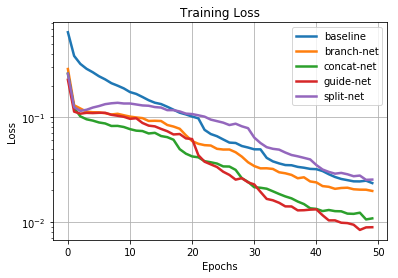

In [108]:
plt.semilogy(df_adap_loss, linewidth=2.5)
plt.grid()
plt.legend(df_adap_loss.columns)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
# plt.savefig('adaptative-training-loss.pdf')
plt.show()

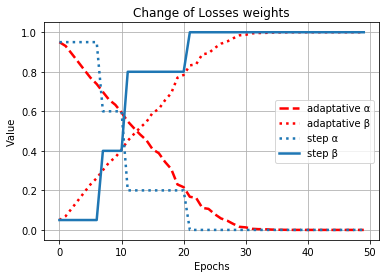

In [193]:
plt.plot(adap_concat['alpha'], 'r--', adap_concat['beta'], 'r:', linewidth=2.5)
plt.plot(concat['alpha'], 'C0:', concat['beta'], 'C0', linewidth=2.5)
plt.legend(['adaptative α', 'adaptative β', 'step α', 'step β'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Change of Losses weights')
# plt.savefig('comparison-losses-weights.pdf')
plt.show()

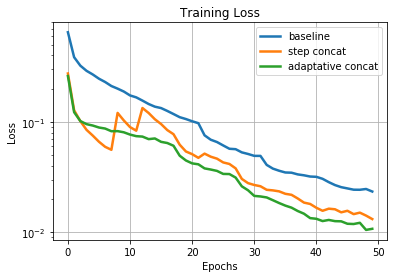

In [195]:
plt.semilogy(baseline['loss'], 'C0',
         concat['loss'], 'C1',
         adap_concat['loss'], 'C2', 
         linewidth=2.5)

plt.legend(['baseline', 'step concat', 'adaptative concat'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('comparison-loss-models.pdf')
plt.show()

In [18]:
adap_concat

,epoch,alpha,beta,loss,lr,predictions_coarse_acc,predictions_coarse_loss,predictions_fine_acc,predictions_fine_loss,time_elapsed,val_loss,val_predictions_coarse_acc,val_predictions_coarse_loss,val_predictions_fine_acc,val_predictions_fine_loss
0,0,9.500000e-01,0.050000,0.260047,0.001000,0.931521,0.238839,0.766104,0.663002,5.813357,0.126017,0.970500,0.110329,0.847250,0.424088
1,1,9.304864e-01,0.069514,0.122481,0.001000,0.968104,0.109059,0.866146,0.377506,4.524682,0.099208,0.974250,0.086718,0.879167,0.336512
2,2,8.908695e-01,0.109130,0.101768,0.001000,0.974000,0.085642,0.886125,0.317622,4.436963,0.084639,0.977167,0.069304,0.893000,0.289912
3,3,8.506274e-01,0.149373,0.095397,0.001000,0.977250,0.073108,0.900146,0.277352,4.345235,0.089674,0.978000,0.064906,0.892917,0.291863
4,4,8.098763e-01,0.190124,0.092698,0.001000,0.979396,0.065205,0.909937,0.249261,4.169226,0.096322,0.977167,0.065348,0.900083,0.272712
5,5,7.698242e-01,0.230176,0.088956,0.001000,0.981292,0.056976,0.916604,0.225182,4.267558,0.111386,0.978333,0.062516,0.881500,0.319558
6,6,7.381384e-01,0.261862,0.087027,0.001000,0.983021,0.052260,0.925062,0.203307,4.255070,0.104750,0.979583,0.059538,0.902750,0.255963
7,7,6.977695e-01,0.302230,0.082348,0.001000,0.984937,0.047314,0.933729,0.181103,4.192244,0.106643,0.979500,0.058435,0.911750,0.242533
8,8,6.583580e-01,0.341642,0.082504,0.001000,0.985417,0.043710,0.936125,0.172068,4.095642,0.113808,0.980083,0.057060,0.911083,0.244825
9,9,6.330236e-01,0.366976,0.080510,0.001000,0.986083,0.040845,0.941958,0.156945,4.029771,0.138077,0.979667,0.069441,0.904500,0.270341


In [116]:
df_val_loss = pd.DataFrame(data = {'baseline': baseline['val_loss'],
                              'branch-net': branch['val_predictions_fine_loss'],
                              'split-net': split['val_predictions_fine_loss'],
                              'concat-net': concat['val_predictions_fine_loss'],
                              'guide-net': guide['val_predictions_fine_loss']})

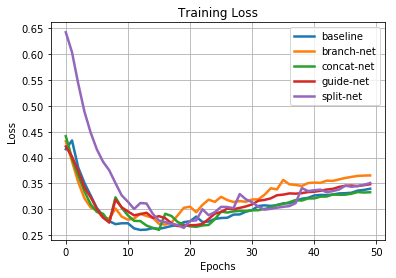

In [117]:
df_val_loss = df_val_loss.apply(lambda x: smooth(x, 0.6), axis=0)

plt.plot(df_val_loss, linewidth=2.5)
plt.grid()
plt.legend(df_val_loss.columns)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
# plt.savefig('training-loss.pdf')
plt.show()

In [119]:
df_val_acc = pd.DataFrame(data = {'baseline': baseline['val_acc'],
                              'branch-net': branch['val_predictions_fine_acc'],
#                               'split-net': split['val_predictions_fine_acc'],
                              'concat-net': concat['val_predictions_fine_acc'],
                              'guide-net': guide['val_predictions_fine_acc']})

In [120]:
# df_val_acc.max()

In [121]:
df_val_acc = df_val_acc.apply(lambda x: smooth(x, 0.6), axis=0)

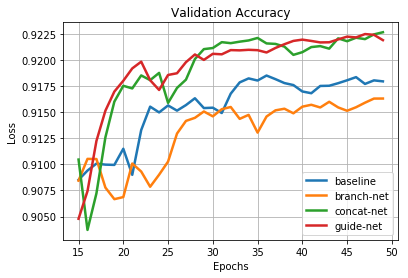

In [197]:
plt.plot(df_val_acc[15:], linewidth=2.5)
plt.grid()
plt.legend(df_val_acc.columns)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Accuracy')
# plt.savefig('training-loss.pdf')
plt.show()

In [14]:
baseline.lr.unique()

array([ 0.001   ,  0.0005  ,  0.00025 ,  0.000125])

In [15]:
guide.lr.unique()

array([  1.00000000e-03,   5.00000000e-04,   2.50000000e-04,
         1.25000000e-04,   6.25000000e-05])

In [16]:
concat.lr.unique()

array([  1.00000000e-03,   5.00000000e-04,   2.50000000e-04,
         1.25000000e-04,   6.25000000e-05])

In [17]:
from keras.utils import np_utils

Using TensorFlow backend.


In [19]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [20]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1974)

In [22]:
train_features = X_train.reshape(X_train.shape[0], 28, 28, 1)/255
vali_features = X_val.reshape(X_val.shape[0], 28, 28, 1)/255
test_features = X_test.reshape(X_test.shape[0], 28, 28, 1)/255

y_train_cat = np_utils.to_categorical(y_train)
y_val_cat = np_utils.to_categorical(y_val)
y_test_cat = np_utils.to_categorical(y_test)

In [23]:
dict_coarse = {0: 0,
              1: 1,
              2: 0,
              3: 2,
              4: 0,
              5: 3,
              6: 0,
              7: 3,
              8: 4,
              9: 3}

y_train_coarse = np.vectorize(dict_coarse.get)(y_train)
y_val_coarse = np.vectorize(dict_coarse.get)(y_val)
y_test_coarse = np.vectorize(dict_coarse.get)(y_test)

y_train_c_cat = np_utils.to_categorical(y_train_coarse)
y_val_c_cat = np_utils.to_categorical(y_val_coarse)
y_test_c_cat= np_utils.to_categorical(y_test_coarse)

In [26]:
from keras.models import load_model
from keras import backend as K

m = load_model('models/adaptative-concat-net-simple.h5')

alpha = K.variable(value=0.95, dtype="float32", name="alpha") # A1 in paper
beta = K.variable(value=0.05, dtype="float32", name="beta") # A2 in paper

m.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              loss_weights=[alpha, beta],
              metrics=['accuracy'])

C:\Users\Matheus Inoue\Anaconda3\lib\site-packages\keras\models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [27]:
m.evaluate(test_features, [y_test_c_cat, y_test_cat])

10000/10000 [==============================] - 4s 350us/step


[0.09878697456475348,
 0.083776325237727725,
 0.38398933526128531,
 0.97950000000000004,
 0.92159999999999997]

In [29]:
pred_fine = np.array([np.argmax(x) for x in m.predict(test_features[0:10000, :, :, :])[1]])
pred_coarse = np.array([np.argmax(x) for x in m.predict(test_features[0:10000, :, :, :])[0]])

In [133]:
m.predict(test_features[0:1, :, :, :])

[array([[  8.41545261e-05,   1.56498008e-05,   2.18886635e-04,
           9.97849464e-01,   1.83182070e-03]], dtype=float32),
 array([[  9.70467734e-11,   8.33842648e-11,   6.82785512e-12,
           1.86126625e-09,   8.15487001e-12,   6.32926156e-09,
           1.54692412e-10,   3.44901052e-10,   2.21702168e-09,
           1.00000000e+00]], dtype=float32)]

In [30]:
true = y_test[0:10000]

In [137]:
y_test_cat

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [181]:
eee=keras.metrics.top_k_categorical_accuracy(y_test_cat, m.predict(test_features[0:10000, :, :, :])[1], k=9)

In [182]:
K.eval(eee)

0.99980003

In [31]:
conf_fine =  np.array([np.max(x) for x in m.predict(vali_features[0:10000, :, :, :])[1]])

In [32]:
conf_fine[conf_fine < .5]


array([ 0.49322417,  0.41913754,  0.36535314,  0.46110782,  0.40070418,
        0.37618858,  0.49008882,  0.42865506,  0.4236728 ,  0.46803275,
        0.47470522,  0.36106253,  0.43558264,  0.39175257,  0.493839  ,
        0.46273401,  0.47884709,  0.49445978,  0.38863465,  0.44057122,
        0.46413732,  0.44189075,  0.47970533], dtype=float32)

In [33]:
pred_fine[conf_fine < .5]

array([3, 6, 9, 4, 7, 7, 8, 3, 3, 4, 7, 8, 6, 2, 4, 3, 7, 1, 5, 8, 9, 1, 3], dtype=int64)

In [34]:
y_test[conf_fine < .5]

array([3, 6, 9, 6, 7, 7, 8, 3, 3, 4, 7, 8, 4, 2, 6, 3, 7, 1, 9, 8, 9, 1, 0], dtype=uint8)

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true, pred)

NameError: name 'pred' is not defined

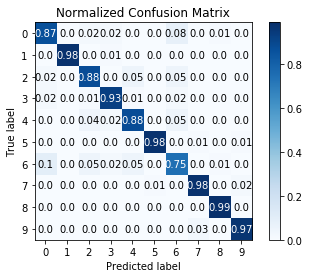

In [86]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, pred_fine, normalize=True)
plt.show()

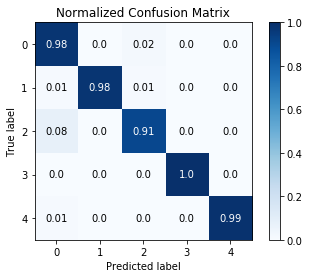

In [38]:
labels = ['a', 'b', 'n', 's', 'w']

skplt.metrics.plot_confusion_matrix(y_test_coarse, pred_coarse, normalize=True)
plt.show()

In [39]:
m_baseline = load_model('models/baseline-simple.h5')

In [42]:
pred_fine_baseline = np.array([np.argmax(x) for x in m_baseline.predict(test_features[0:10000, :, :, :])])

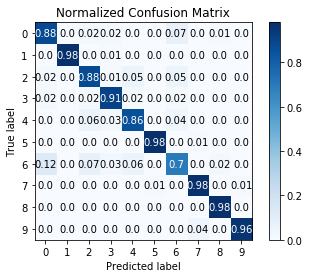

In [43]:
skplt.metrics.plot_confusion_matrix(y_test, pred_fine_baseline, normalize=True)
plt.show()

In [179]:
eeebase=keras.metrics.top_k_categorical_accuracy(y_test_cat, m_baseline.predict(test_features[0:10000, :, :, :]), k=9)

In [180]:
K.eval(eeebase)

0.99970001

In [176]:
0.98079997-0.97869998

0.0020999899999999405